In [1]:
import pandas as pd
import numpy as np

In [2]:
# 数据地址
datafile = 'E:\\NLP\\Python数据分析与挖掘实战\\chapter4\\demo\\data\\discretization_data.xls'
# 读取数据
data = pd.read_excel(datafile)
# copy 以‘肝气郁结证型系数’为索引列的数据 防止原始数据被污染
data = data[u'肝气郁结证型系数'].copy()

In [3]:
k = 4 

In [4]:
# 等宽离散化，各个类比依次命名为0， 1， 2， 3
'''
cut()函数可以将一个数组中的数据切分成几个部分。

将数据分为几个部分，就称为几个面元。

cut(数据数组,面元数组)
https://www.cnblogs.com/fightfordream/p/7072966.html
'''
d1 = pd.cut(data, k, labels = range(k))

In [5]:
# 等频离散化
w = [1.0 * i / k for i in range(k + 1)]
# 使用 describe 函数自动计算分位数
# percentiles -> 指定分位数分位标准
# 切片取值
w = data.describe(percentiles = w)[4:4 + k + 1]
w[0] = w[0] * (1 - np.e - 10)
# print(1 - np.e - 10)
d2 = pd.cut(data, w, labels = range(k))

In [6]:
# K-means 聚类
from sklearn.cluster import KMeans
# 建立模型，n_jobs -> 并行数(一般情况下等于cpu数)
kmodel = KMeans(n_clusters = k, n_jobs = 4)
# 训练模型
# reshape -> 给予数组一个新的形状，而不改变它的数据，参数为元组
# ML_BASE/blob/master/ml_base/_numpy/_numpy.ipynb
kmodel.fit(data.values.reshape((len(data), 1)))
# 输出聚类中心，并且排序(默认是随机序的)
# DataFrame 中的排序 -> sort_values
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0)
print(c)
# 相邻两项求中点，作边界点
w = c.rolling(window=2,center=False).mean().iloc[1:]
# 把 首尾 的边界点加上
w = [0] + list(w[0]) + [data.max()]
d3 = pd.cut(data, w, labels = range(k))

          0
1  0.137643
0  0.221225
3  0.295406
2  0.408679


In [7]:
# 自定义作图函数来显示聚类结果
def cluster_plot(d, k):
    import matplotlib.pyplot as plt
    # 正常显示中文标签, 设置 FangSong/黑体
    plt.rcParams['font.sans-serif'] = [u'SimHei']
    # 解决 负号 的显示问题
    plt.rcParams['axes.unicode_minus'] = False
    # 创建图像区域，指定比例
    plt.figure(figsize = (8, 3))
    for j in range(0, k):
        plt.plot(data[d ==j], [i for i in d[d == j]], 'o')
    plt.ylim(-0.5, k-0.5)
    return plt

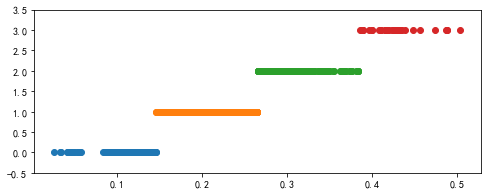

In [8]:
# 等宽离散化
cluster_plot(d1, k).show()

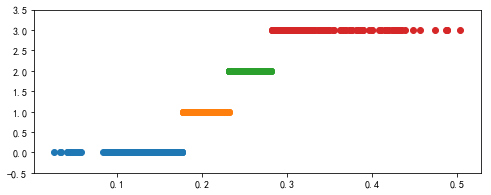

In [9]:
# 等频离散化
cluster_plot(d2, k).show()

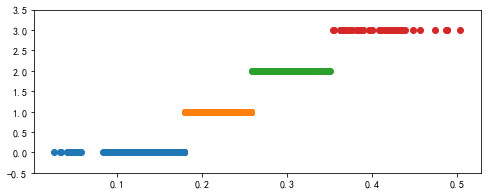

In [10]:
# (一维)聚类离散化
cluster_plot(d3, k).show()